<img src="https://vetvet.co.il/wp-content/uploads/2014/10/dog-cat-PNG-300x150.png" width="600" height="300" />


# ***Assignment II - December 2022***
 *Ido Gazit, Rony Lupatin, Hemdat Lebel*

---
***Our goal is to correctly classify images of dogs and cats***


## **Library Import**

In [2]:
# generals
import os
import pandas as pd
import numpy as np

# plots
import seaborn as sns
import matplotlib.pyplot as plt

# model evalutation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# hide warnings
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Flatten, Input, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers

from keras import callbacks
from keras import optimizers
from keras.layers import Dropout, Flatten, Dense
from keras.optimizers import Adam
#from keras.preprocessing.image import ImageDataGenerator
#from keras.datasets import cifar10
#from keras.utils import to_categorical

import random as python_random


Set randoms to get reproducible results each training

In [3]:
np.random.seed(42)
tf.random.set_seed(42)
python_random.seed(42)

## **Data import**

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/MyDrive/MLDL advance course /assignment II/
X_train = np.load("X_train.npy")
Y_train = np.load("Y_train.npy")
X_test = np.load("X_test.npy")
Y_test = np.load("Y_test.npy")

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1LHdCVw-ts68b-5PqJNsgcLMAxYZK9ZV5/MLDL advance course /assignment II


##**Explorization & Preprocessing**


In [5]:
print('Shape of x_train is:', X_train.shape)
print('Shape of y_train is:', Y_train.shape)
print('Shape of x_test is:', X_test.shape)
print('Shape of y_test is:', Y_test.shape)

Shape of x_train is: (3200, 180, 180, 3)
Shape of y_train is: (3200,)
Shape of x_test is: (800, 180, 180, 3)
Shape of y_test is: (800,)


We can see that each sample is an RGB image of size 180X180 pixels.

In [6]:
np.min(X_train), np.max(X_train), X_train.dtype

(0.0, 255.0, dtype('float64'))

Each pixel has integer values ranging from 0 to 255.

In [7]:
np.min(Y_train), np.max(Y_train), Y_train.dtype


(0.0, 1.0, dtype('float64'))

Similarly, there are 2 labels (classes) in the dataset, represented by the integers 0- cat,1 - dog.

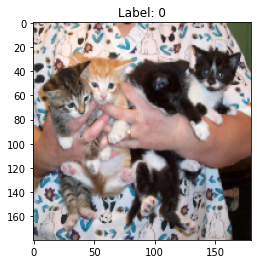

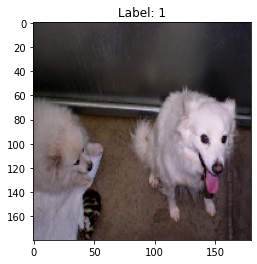

In [8]:
mask_to_cat = np.where(Y_train==0)
plt.imshow((X_train[mask_to_cat][0]).astype(int))
plt.title('Label: ' + str(int(Y_train[mask_to_cat][0])))
plt.show()

mask_to_dog = np.where(Y_train==1)
plt.imshow((X_train[mask_to_dog][0]).astype(int))
plt.title('Label: ' + str(int(Y_train[mask_to_dog][0])))
plt.show()

###**Normalization**
Image data should often be scaled in some way to improve the convergence of the neural network. The two most common ways are to normalize the data to a Gaussian distribution, or to normalize it by dividing the data with the maximal value. We'll be using the latter method:

In [9]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Let's check how the normalization changed the data:

In [10]:
np.min(X_train), np.max(X_train), X_train.dtype

(0.0, 1.0, dtype('float64'))

We see that the min value stayed 0, while the max value is now 1. Also, the data is now of type 'float' and not 'int'.

We'll plot some samples again to make sure the shape of the images in the data did not change:

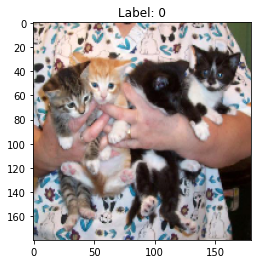

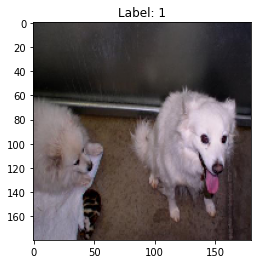

In [11]:
plt.imshow((X_train[mask_to_cat][0]))
plt.title('Label: ' + str(int(Y_train[mask_to_cat][1])))
plt.show()

plt.imshow((X_train[mask_to_dog][0]))
plt.title('Label: ' + str(int(Y_train[mask_to_dog][1])))
plt.show()

###**Train and validation split**
Finally, we'll split the training data into training vs validation:



In [12]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, random_state=42, test_size=1/4)

We chose 1/4 as the split ratio to keep the valdiation and testing sets the same size.<br> After this split we should have 2400 training samples, 800 testing, and 800 validation:

In [13]:
print('Shape of X_train is:', X_train.shape)
print('Shape of Y_train is:', Y_train.shape)
print('Shape of X_test is:', X_test.shape)
print('Shape of Y_test is:', Y_test.shape)
print('Shape of X_val is:', X_val.shape)
print('Shape of Y_val is:', Y_val.shape)

Shape of X_train is: (2400, 180, 180, 3)
Shape of Y_train is: (2400,)
Shape of X_test is: (800, 180, 180, 3)
Shape of Y_test is: (800,)
Shape of X_val is: (800, 180, 180, 3)
Shape of Y_val is: (800,)


## **Part 1 - a Basic CNN**

We shall begin with a simple model: four 2-dimensional convolutional layers followed by two fully connected layers (one hidden layer and one output layer). <br> This is a classic architecture, and we are expecting for decent results. <br> We used maxpooling layers to avoid overfitting, as explained by GPT:
Pooling layers: These layers are used to reduce the size of the input data, typically by taking the maximum or average value of a small window of the input data. This has the effect of downsampling the data, which reduces the computational complexity of the network and helps to reduce overfitting.

In [13]:
tf.random.set_seed(12)
simple_model = Sequential()
simple_model.add(Input(shape=(180, 180, 3)))
simple_model.add(Conv2D(32, kernel_size=(3, 3), activation="relu"))
simple_model.add(MaxPooling2D(pool_size=(2, 2)))
simple_model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
simple_model.add(MaxPooling2D(pool_size=(2, 2)))
simple_model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
simple_model.add(MaxPooling2D(pool_size=(2, 2)))
simple_model.add(Conv2D(128, kernel_size=(3, 3), activation="relu"))
simple_model.add(MaxPooling2D(pool_size=(2, 2)))
simple_model.add(Dense(64, activation='relu'))
simple_model.add(Flatten())
simple_model.add(Dropout(0.5, seed=42))
simple_model.add(Dense(1, activation="sigmoid"))

In [14]:
simple_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 20, 64)       0

In [15]:
simple_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
simple_model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=256, epochs=16)

Epoch 1/16
10/10 [==============================] - 17s 479ms/step - loss: 0.6936 - accuracy: 0.5088 - val_loss: 0.6886 - val_accuracy: 0.5725
Epoch 2/16
10/10 [==============================] - 3s 285ms/step - loss: 0.6899 - accuracy: 0.5346 - val_loss: 0.6836 - val_accuracy: 0.5875
Epoch 3/16
10/10 [==============================] - 3s 288ms/step - loss: 0.6785 - accuracy: 0.5804 - val_loss: 0.6705 - val_accuracy: 0.5750
Epoch 4/16
10/10 [==============================] - 3s 288ms/step - loss: 0.6804 - accuracy: 0.5542 - val_loss: 0.6864 - val_accuracy: 0.5200
Epoch 5/16
10/10 [==============================] - 3s 287ms/step - loss: 0.6780 - accuracy: 0.5808 - val_loss: 0.6649 - val_accuracy: 0.5938
Epoch 6/16
10/10 [==============================] - 3s 289ms/step - loss: 0.6510 - accuracy: 0.6050 - val_loss: 0.6307 - val_accuracy: 0.6388
Epoch 7/16
10/10 [==============================] - 3s 290ms/step - loss: 0.6278 - accuracy: 0.6317 - val_loss: 0.5989 - val_accuracy: 0.6812
Epoch

Evaluate the model



In [16]:
Y_pred = simple_model.predict(X_test)
Y_pred_labels = np.round(Y_pred)
print('Test Accuracy: ', accuracy_score(Y_test, Y_pred_labels))

Y_pred_train = simple_model.predict(X_train)
Y_pred_labels_train = np.round(Y_pred_train)
print('Train Accuracy' , accuracy_score(Y_train,Y_pred_labels_train))

25/25 [==============================] - 0s 14ms/step
Test Accuracy:  0.7475
75/75 [==============================] - 1s 15ms/step
Train Accuracy 0.77


We can see good results right off the bat, so for now we will keep it simple and will not add dropouts and normalizations.<br> We could refine the amount of neurons etc., but we chose to focus on that in the 2nd part, where we present our own architecture.

## **Part 2 - our model**

Our architecture draws inspiration from larger networks in that it grows and shrinks in the amount of neurons in the powers of 2, and includes normalization methods such as pooling layers, dropouts and batch normalizations.<br> We still kept it quite small in order not to overfit on such a small dataset.

In [20]:
tf.random.set_seed(12)
model=Sequential()

model.add(Input(shape=(180, 180, 3)))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size=(3, 3), activation="relu"))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256,kernel_size=(3, 3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.2))

model.add(Conv2D(128,kernel_size=(3, 3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 batch_normalization_6 (Batc  (None, 178, 178, 32)     128       
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 178, 178, 32)      0         
                                                                 
 conv2d_11 (Conv2D)          (None, 176, 176, 64)      18496     
                                                                 
 batch_normalization_7 (Batc  (None, 176, 176, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 88, 88, 64)      

In [22]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=64, epochs=20)

Epoch 1/20
38/38 [==============================] - 26s 598ms/step - loss: 0.9187 - accuracy: 0.5375 - val_loss: 0.7423 - val_accuracy: 0.4875
Epoch 2/20
38/38 [==============================] - 16s 425ms/step - loss: 0.7615 - accuracy: 0.5942 - val_loss: 0.7051 - val_accuracy: 0.4950
Epoch 3/20
38/38 [==============================] - 16s 421ms/step - loss: 0.7127 - accuracy: 0.6237 - val_loss: 0.7512 - val_accuracy: 0.4888
Epoch 4/20
38/38 [==============================] - 16s 418ms/step - loss: 0.6563 - accuracy: 0.6562 - val_loss: 0.7182 - val_accuracy: 0.5188
Epoch 5/20
38/38 [==============================] - 16s 420ms/step - loss: 0.6155 - accuracy: 0.6704 - val_loss: 0.7167 - val_accuracy: 0.5113
Epoch 6/20
38/38 [==============================] - 16s 422ms/step - loss: 0.5656 - accuracy: 0.7204 - val_loss: 0.7690 - val_accuracy: 0.4875
Epoch 7/20
38/38 [==============================] - 16s 424ms/step - loss: 0.5211 - accuracy: 0.7371 - val_loss: 0.8500 - val_accuracy: 0.4888

Evaluate the model

In [35]:
Y_pred = model.predict(X_test)
Y_pred_labels = np.round(Y_pred)
print('Test Accuracy: ', accuracy_score(Y_test, Y_pred_labels))

Y_pred_train = model.predict(X_train)
Y_pred_labels_train = np.round(Y_pred_train)
print('Train Accuracy' , accuracy_score(Y_train,Y_pred_labels_train))

25/25 [==============================] - 1s 48ms/step
Test Accuracy:  0.79125
75/75 [==============================] - 3s 47ms/step
Train Accuracy 0.9075


## **Part 3 - Transfer learning**

In our transfer learning model, we loaded the Inception-V3 model from the Keras applications.<br> We loaded it with the weights as trained on ImageNet, but removed the top layer (which differentiates between 10K classes using SoftMax). In our case, we had to classify only 2 classes, so we used a sigmoid activation in the top layer. <br> However, Inception-V3's training on the huge ImageNet DB has made the network very efficient in feature extraction, and it was trained on dogs and cats as well. Hence, we froze the convolutional blocks of the network, thus making them untrainable and keeping the ImageNet weights.<br> We then added only the top sigmoid classification output layer, making very little parameters trainable. We shall now fit the compiled model on out small DB.

In [26]:
base_model = tf.keras.applications.InceptionV3(input_shape=(180,180,3), include_top=False)

In [27]:
base_model.trainable = False
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_188 (Conv2D)            (None, 89, 89, 32)   864         ['input_5[0][0]']                
                                                                                                  
 batch_normalization_188 (Batch  (None, 89, 89, 32)  96          ['conv2d_188[0][0]']             
 Normalization)                                                                                   
                                                                                       

In [28]:
inputs = layers.Input(shape=(180,180,3))
transfer_output = base_model(inputs)
x=layers.Flatten()(transfer_output)
outputs = layers.Dense(1,activation="sigmoid")(x)
transfer = tf.keras.models.Model(inputs=[inputs], outputs=[outputs])

In [29]:
transfer.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, 4, 4, 2048)        21802784  
                                                                 
 flatten_2 (Flatten)         (None, 32768)             0         
                                                                 
 dense_2 (Dense)             (None, 1)                 32769     
                                                                 
Total params: 21,835,553
Trainable params: 32,769
Non-trainable params: 21,802,784
_________________________________________________________________


In [31]:
transfer.compile(optimizer="rmsprop", loss="binary_crossentropy",metrics=['accuracy'])
transfer.fit(X_train,Y_train, epochs=8, validation_data=(X_val,Y_val), batch_size=32)

Epoch 1/8
75/75 [==============================] - 11s 91ms/step - loss: 0.7194 - accuracy: 0.9317 - val_loss: 0.9485 - val_accuracy: 0.9287
Epoch 2/8
75/75 [==============================] - 5s 70ms/step - loss: 0.3725 - accuracy: 0.9629 - val_loss: 0.2668 - val_accuracy: 0.9700
Epoch 3/8
75/75 [==============================] - 5s 70ms/step - loss: 0.1614 - accuracy: 0.9787 - val_loss: 0.2737 - val_accuracy: 0.9737
Epoch 4/8
75/75 [==============================] - 5s 71ms/step - loss: 0.0915 - accuracy: 0.9887 - val_loss: 0.6764 - val_accuracy: 0.9350
Epoch 5/8
75/75 [==============================] - 5s 71ms/step - loss: 0.0646 - accuracy: 0.9900 - val_loss: 0.3637 - val_accuracy: 0.9712
Epoch 6/8
75/75 [==============================] - 5s 71ms/step - loss: 0.0636 - accuracy: 0.9937 - val_loss: 0.3447 - val_accuracy: 0.9663
Epoch 7/8
75/75 [==============================] - 5s 71ms/step - loss: 0.0274 - accuracy: 0.9967 - val_loss: 0.5349 - val_accuracy: 0.9625
Epoch 8/8
75/75 [==

Evaluate the model

In [32]:
Y_pred = transfer.predict(X_test)
Y_pred_labels = np.round(Y_pred)
print('Test Accuracy: ', accuracy_score(Y_test, Y_pred_labels))

Y_pred_train = transfer.predict(X_train)
Y_pred_labels_train = np.round(Y_pred_train)
print('Train Accuracy' , accuracy_score(Y_train,Y_pred_labels_train))

25/25 [==============================] - 2s 50ms/step
Test Accuracy:  0.97375
75/75 [==============================] - 4s 48ms/step
Train Accuracy 0.9979166666666667


## **Submission**

In [33]:
results = {'model': ['Basic CNN', 'My Model', 'InceptionV3'],
           'Test score (Accuracy)': ['0.7475', '0.79125', '0.97375'],
           'Train score (Accuracy)': ['0.77', '0.9075', '0.997'],
           'Number of trainable parameters': ['143,617', '924,353', '32,769'],
           'Number of layers': ['6', '8', '48'],
           'Regularization methods': ['MaxPooling, Dropout', 'MaxPooling, Dropout,BatchNormalization', 'BatchNormalization'],
           'Number of epochs': ['16', '20', '20'],
           'Loss function': ['binary_crossentropy', 'binary_crossentropy', 'binary_crossentropy'],
           'Optimizer': ['adam', 'adam', 'rmsprop']
           }

df = pd.DataFrame(results)
df

,model,Test score (Accuracy),Train score (Accuracy),Number of trainable parameters,Number of layers,Regularization methods,Number of epochs,Loss function,Optimizer
0,Basic CNN,0.7475,0.77,"143,617",6,"MaxPooling, Dropout",16,binary_crossentropy,adam
1,My Model,0.79125,0.9075,"924,353",8,"MaxPooling, Dropout,BatchNormalization",20,binary_crossentropy,adam
2,InceptionV3,0.97375,0.997,"32,769",48,BatchNormalization,20,binary_crossentropy,rmsprop


In [34]:
import os
df.to_csv(os.path.join(os.getcwd(), 'exercise2.csv'))